In [1]:
# Load the dataset from CSV file.  

import pandas as pd 

dataset = pd.read_csv("../data/Airplane.csv" , index_col = 0)

dataset.sample()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
25643,45218,Female,disloyal Customer,21,Business travel,Eco,1013,4,4,4,...,1,1,4,5,2,4,1,12,64.0,satisfied


In [2]:
# Determine the type of each column (categorical vs numerical). 

def column_type_detection():

    dataset_dtypes = dataset.dtypes
    categorical_cols = []  
    categorical_df = {"categories" : [] , "number of categories" : []}
    numerical_cols = [] 
    numerical_df = {"range" : [] , "number of unique values" : []}

    for column in list(dataset.columns)[1:] : 
        if dataset_dtypes[column] not in [int,float]:
            categorical_cols.append(column)
            categorical_df["categories"].append(list(dataset[column].unique()))
            categorical_df["number of categories"].append(len(categorical_df["categories"][-1]))
        else : 
            n_unique = dataset[column].nunique()
            if dataset_dtypes[column] == float or n_unique > 10 : 
                numerical_cols.append(column)
                numerical_df["range"].append((dataset[column].min(),dataset[column].max()))
                numerical_df["number of unique values"].append(n_unique)
            else :
                categorical_cols.append(column)
                categorical_df["categories"].append(sorted(list(dataset[column].unique())))
                categorical_df["number of categories"].append(n_unique)
    
    categorical_df = pd.DataFrame(categorical_df , index = categorical_cols)
    numerical_df = pd.DataFrame(numerical_df , index = numerical_cols)
    return categorical_df , numerical_df

categorical_df , numerical_df = column_type_detection()

# Print summary for categorical columns : list of unique categories.  

print(f"Categoricals : \n{categorical_df}")    

# Print summary for numerical columns : number of unique values and value range. 

print(f"Numericals : \n{numerical_df}")

Categoricals : 
                                                             categories  \
Gender                                                   [Male, Female]   
Customer Type                       [Loyal Customer, disloyal Customer]   
Type of Travel                       [Personal Travel, Business travel]   
Class                                         [Eco Plus, Business, Eco]   
Inflight wifi service                                [0, 1, 2, 3, 4, 5]   
Departure/Arrival time convenient                    [0, 1, 2, 3, 4, 5]   
Ease of Online booking                               [0, 1, 2, 3, 4, 5]   
Gate location                                        [0, 1, 2, 3, 4, 5]   
Food and drink                                       [0, 1, 2, 3, 4, 5]   
Online boarding                                      [0, 1, 2, 3, 4, 5]   
Seat comfort                                         [0, 1, 2, 3, 4, 5]   
Inflight entertainment                               [0, 1, 2, 3, 4, 5]   
On-board 

In [3]:
# Calculate the number and percentage of missing values per column.  

def columns_missing_count():
    
    columns_missing = {"num_missing" : [] }

    for column in list(dataset.columns)[1:] :
        columns_missing["num_missing"].append(dataset[column].isnull().sum())
    
    columns_missing = pd.DataFrame(columns_missing , index = list(dataset.columns)[1:])
    columns_missing["missing_percentage"] = columns_missing["num_missing"] / dataset.shape[0] * 100
    print(columns_missing)

columns_missing_count()

                                   num_missing  missing_percentage
Gender                                       0            0.000000
Customer Type                                0            0.000000
Age                                          0            0.000000
Type of Travel                               0            0.000000
Class                                        0            0.000000
Flight Distance                              0            0.000000
Inflight wifi service                        0            0.000000
Departure/Arrival time convenient            0            0.000000
Ease of Online booking                       0            0.000000
Gate location                                0            0.000000
Food and drink                               0            0.000000
Online boarding                              0            0.000000
Seat comfort                                 0            0.000000
Inflight entertainment                       0            0.00

In [4]:
# Analyze numerical features : std , skewness , number of outliers.  

def count_outliers(column):

    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    return ((dataset[column] < Q1 - IQR * 1.5) | (dataset[column] > Q3 + IQR * 1.5)).sum()


def numerical_analysis():

    numerical_analysis_df = {"Std" : [] , "Skew" : [] , "Number of outliers" : []} 

    for column in numerical_df.index :
        numerical_analysis_df["Std"].append(dataset[column].std())
        numerical_analysis_df["Skew"].append(dataset[column].skew())
        numerical_analysis_df["Number of outliers"].append(count_outliers(column))

    return pd.DataFrame(numerical_analysis_df , index = numerical_df.index)
     
numerical_analysis_df = numerical_analysis()
print(numerical_analysis_df)

                                   Std      Skew  Number of outliers
Age                          15.114964 -0.004516                   0
Flight Distance             997.147281  1.109466                2291
Departure Delay in Minutes   38.230901  6.733980               14529
Arrival Delay in Minutes     38.698682  6.596637               13954


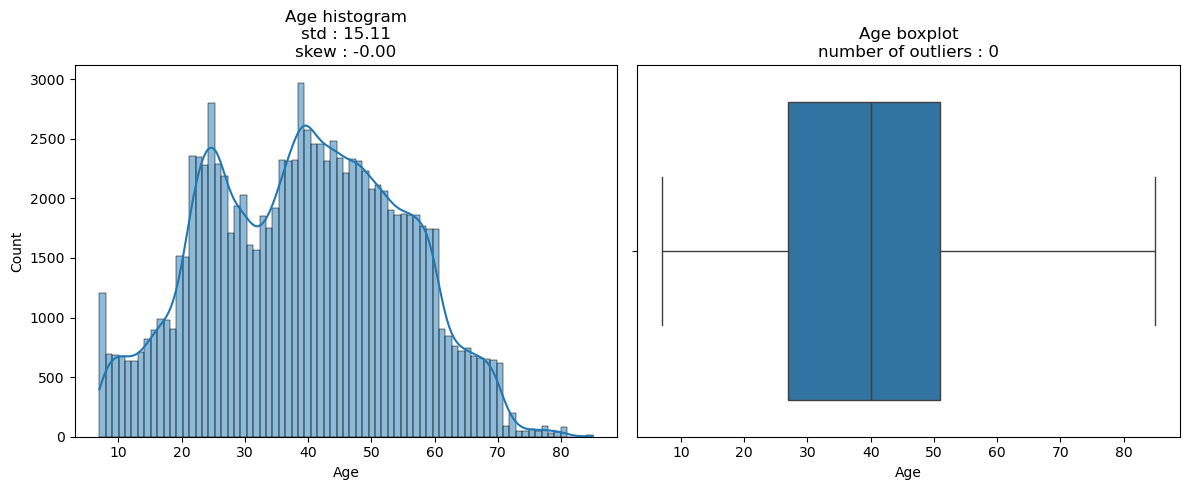

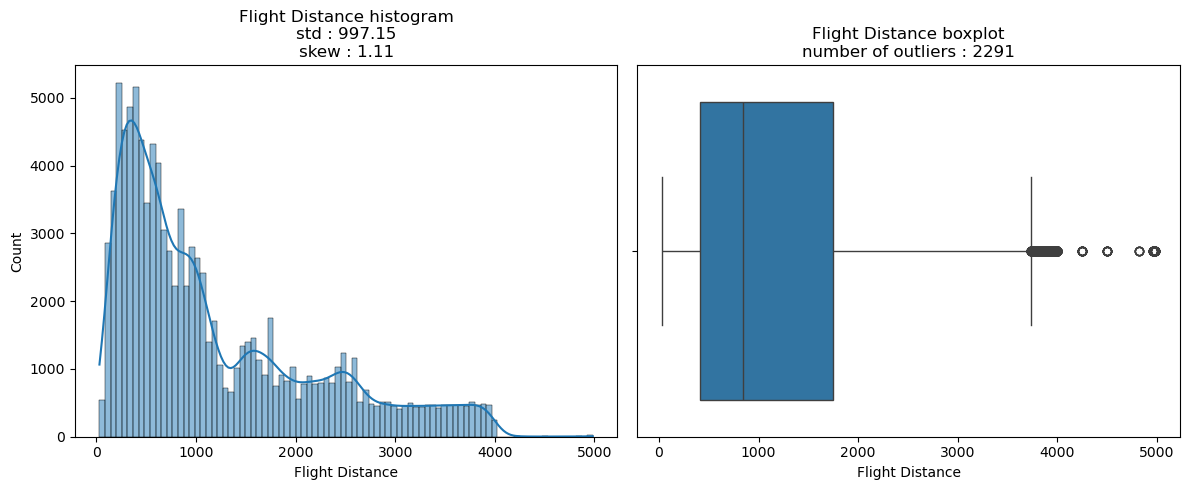

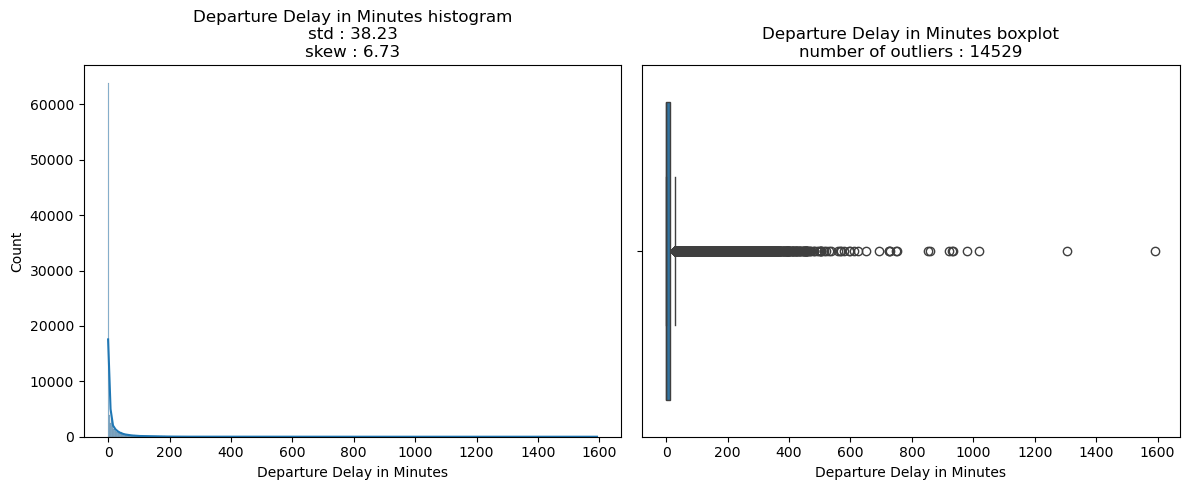

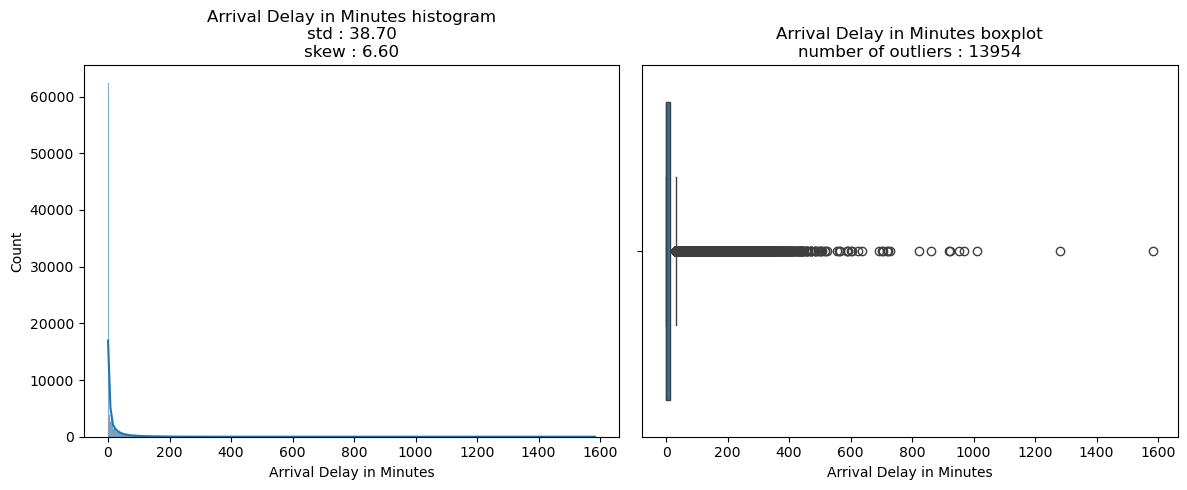

In [5]:
# Visualize numerical features using histogram and boxplot.  

import seaborn as sns 

import matplotlib.pyplot as plt 

def numericals_plot():

    for column in numerical_df.index :
        plt.figure(figsize = (12,5))

        plt.subplot(1,2,1)
        sns.histplot(dataset[column] , kde = True)
        plt.title(f"{column} histogram\nstd : {numerical_analysis_df.loc[column,"Std"]:.2f}\nskew : {numerical_analysis_df.loc[column,"Skew"]:.2f}")

        plt.subplot(1,2,2)
        sns.boxplot(x = dataset[column])
        plt.title(f"{column} boxplot\nnumber of outliers : {numerical_analysis_df.loc[column,"Number of outliers"]}")

        plt.tight_layout()
        plt.show()

numericals_plot()

In [6]:
# Analyze distribution of categorical columns. 

def categorical_analysis():

    categorical_analysis_df = {"distribution of categories" : []}

    for column in categorical_df.index :
        distro = dataset.groupby(column).agg({column : "count"})[column]/dataset.shape[0]*100
        distro = [float(f"{x:.2f}") for x in distro]
        categorical_analysis_df["distribution of categories"].append(tuple(distro)) 

    return pd.DataFrame(categorical_analysis_df , index = categorical_df.index)

categorical_analysis_df = categorical_analysis()
print(categorical_analysis_df)

                                                  distribution of categories
Gender                                                        (50.75, 49.25)
Customer Type                                                 (81.73, 18.27)
Type of Travel                                                (68.96, 31.04)
Class                                                    (47.8, 44.99, 7.21)
Inflight wifi service               (2.99, 17.17, 24.86, 24.9, 19.05, 11.04)
Departure/Arrival time convenient   (5.1, 14.92, 16.55, 17.29, 24.59, 21.56)
Ease of Online booking             (4.32, 16.87, 23.12, 23.53, 18.84, 13.33)
Gate location                         (0.0, 16.9, 18.73, 27.5, 23.51, 13.36)
Food and drink                      (0.1, 12.35, 21.16, 21.46, 23.44, 21.47)
Online boarding                    (2.34, 10.29, 16.85, 20.98, 29.61, 19.93)
Seat comfort                        (0.0, 11.62, 14.34, 17.99, 30.57, 25.48)
Inflight entertainment             (0.01, 12.01, 16.97, 18.42, 28.32, 24.27)

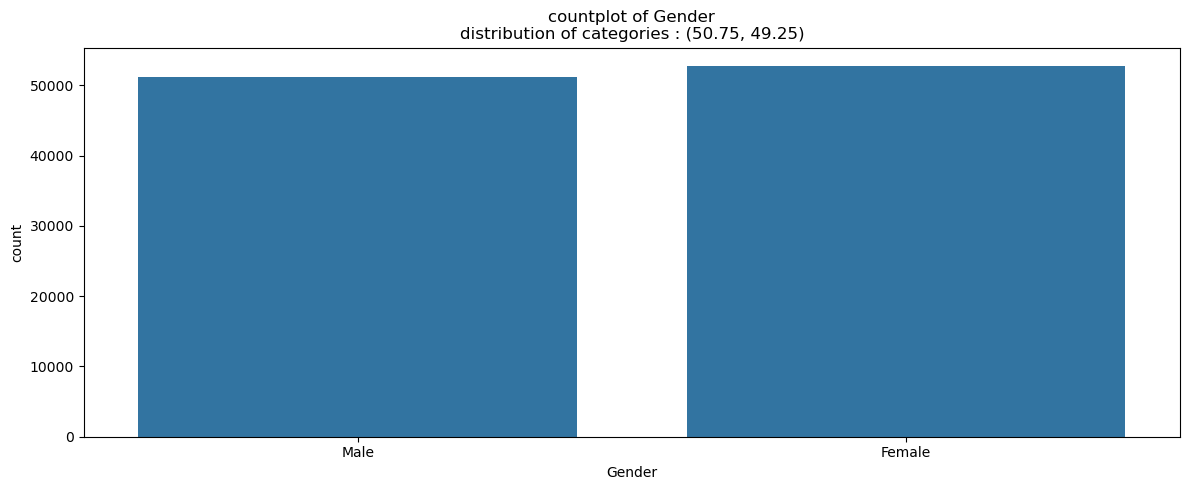

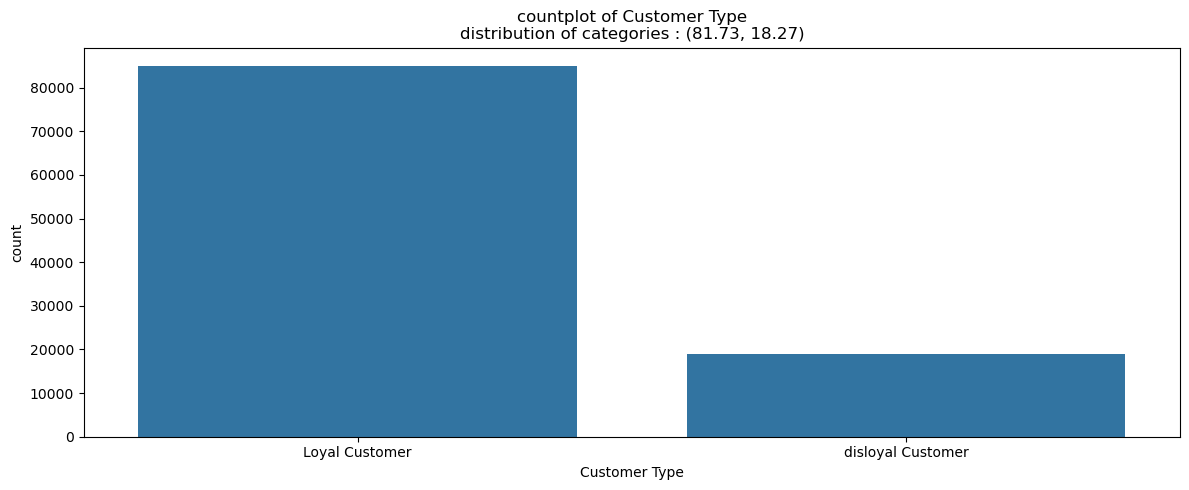

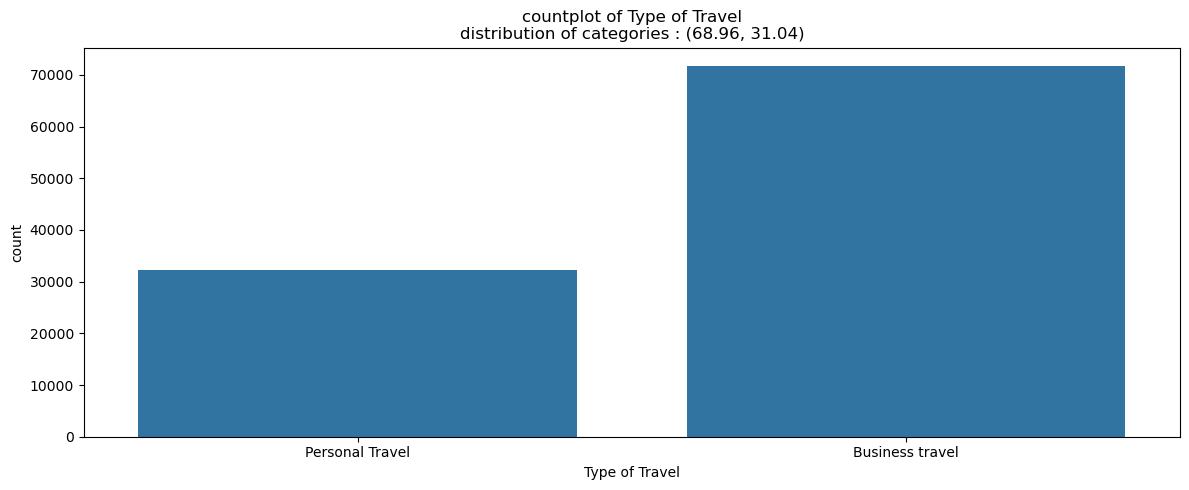

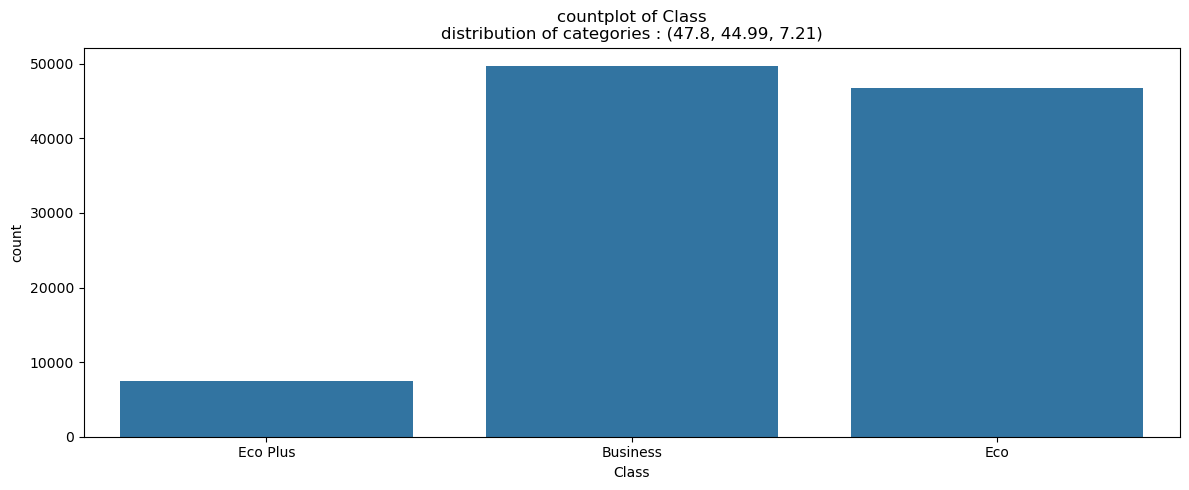

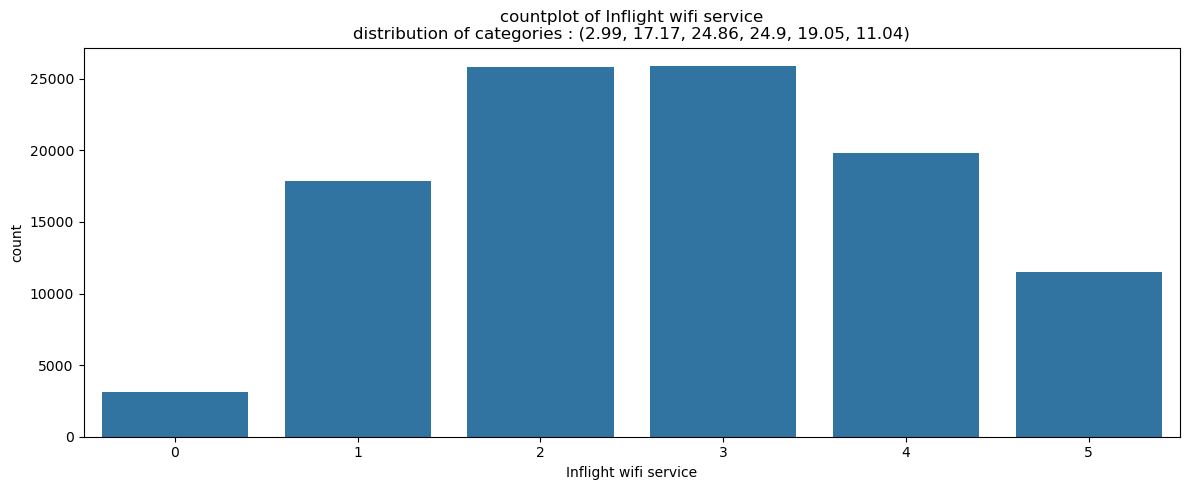

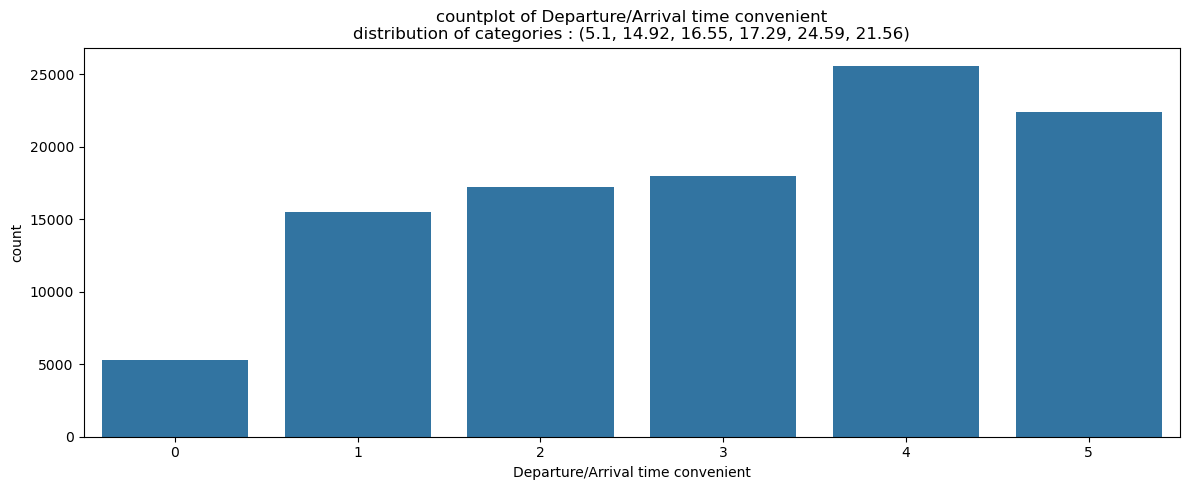

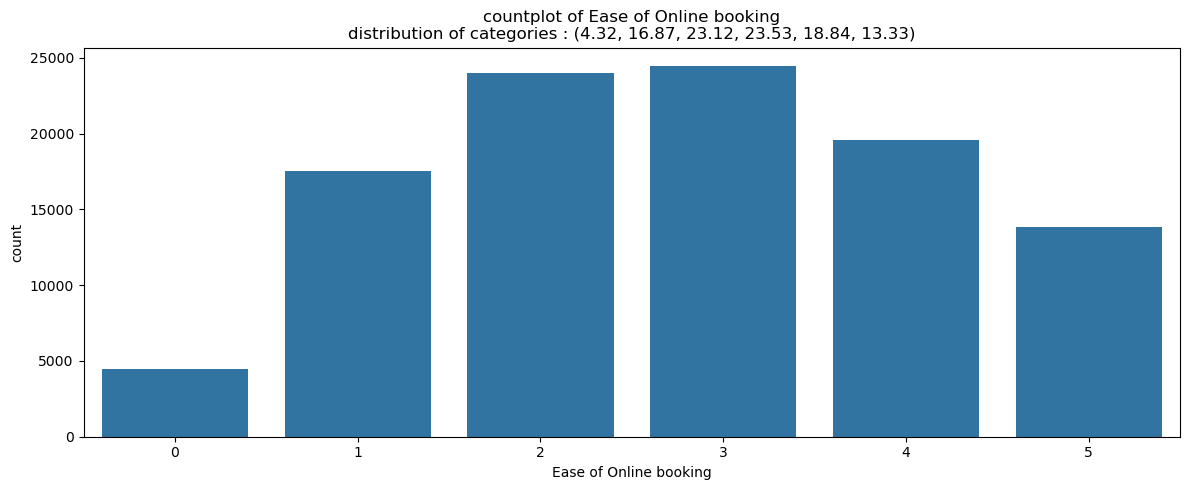

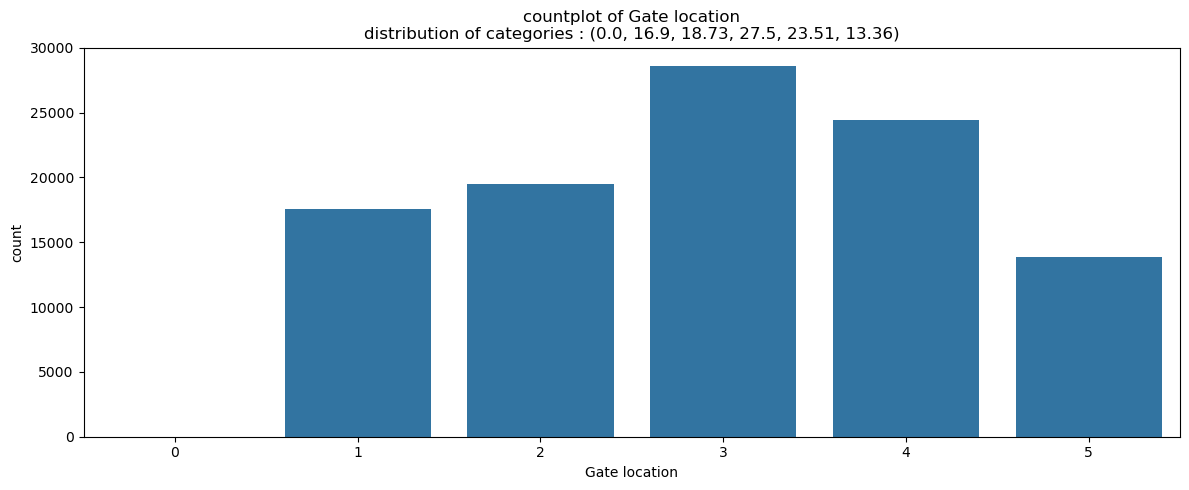

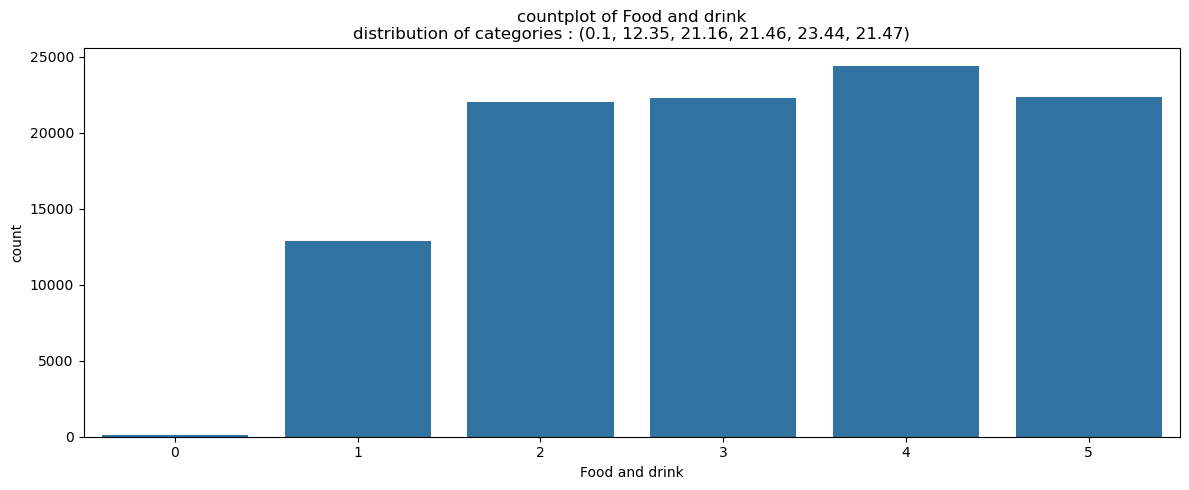

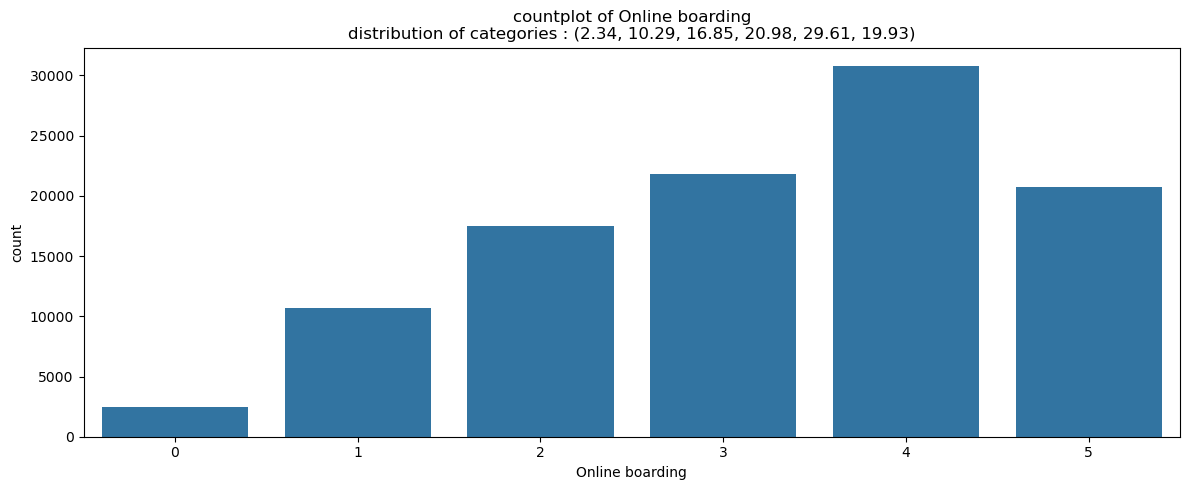

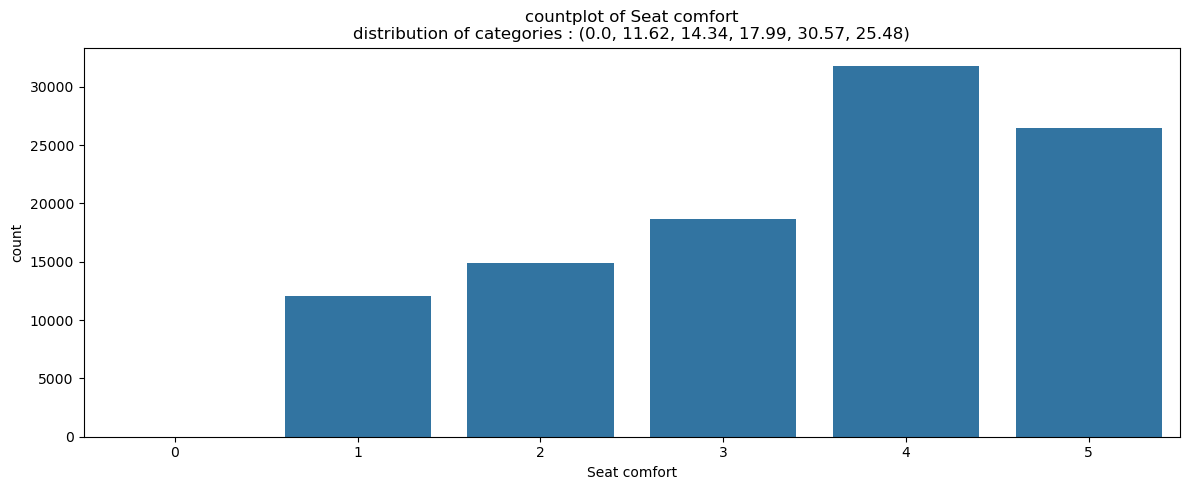

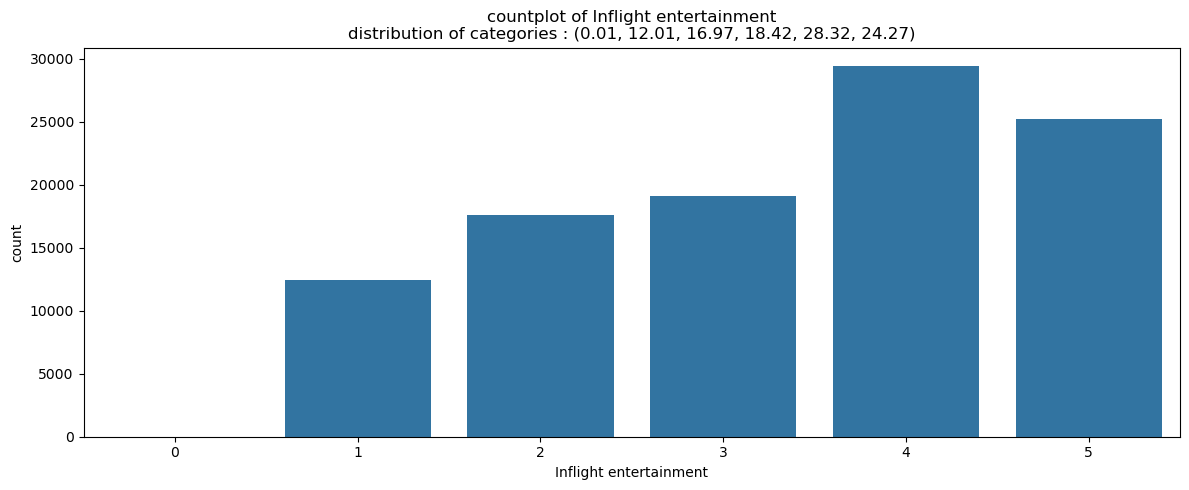

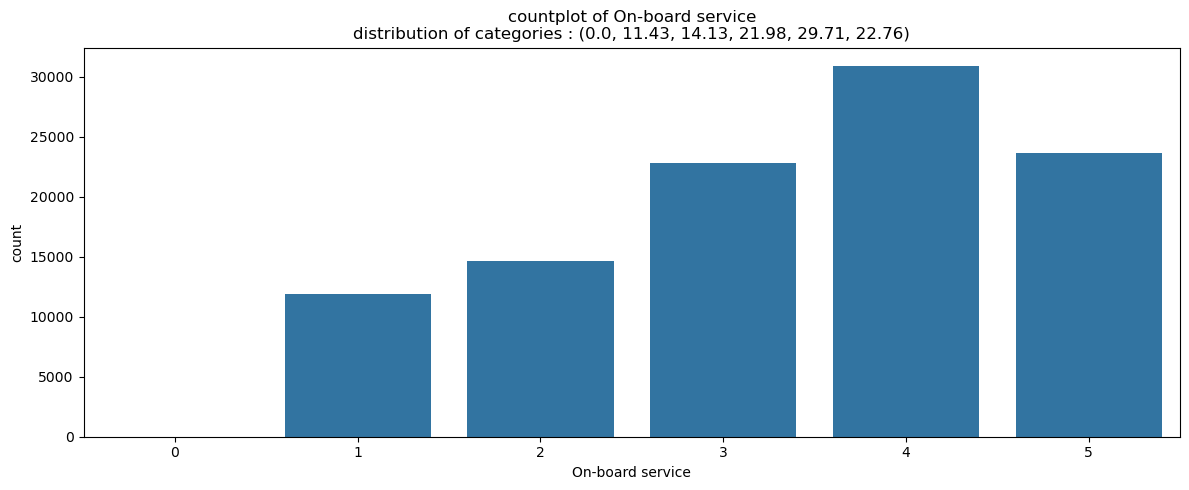

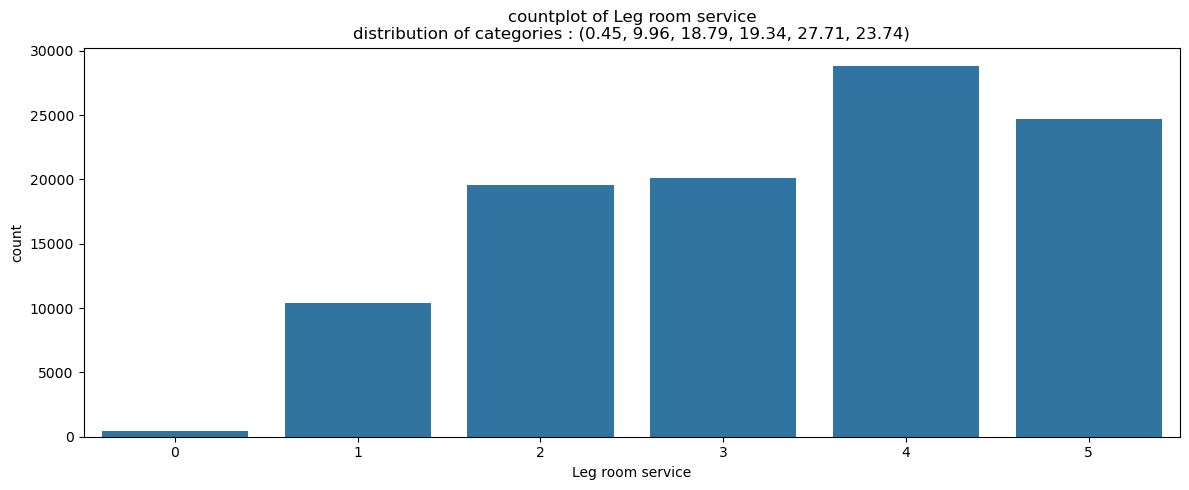

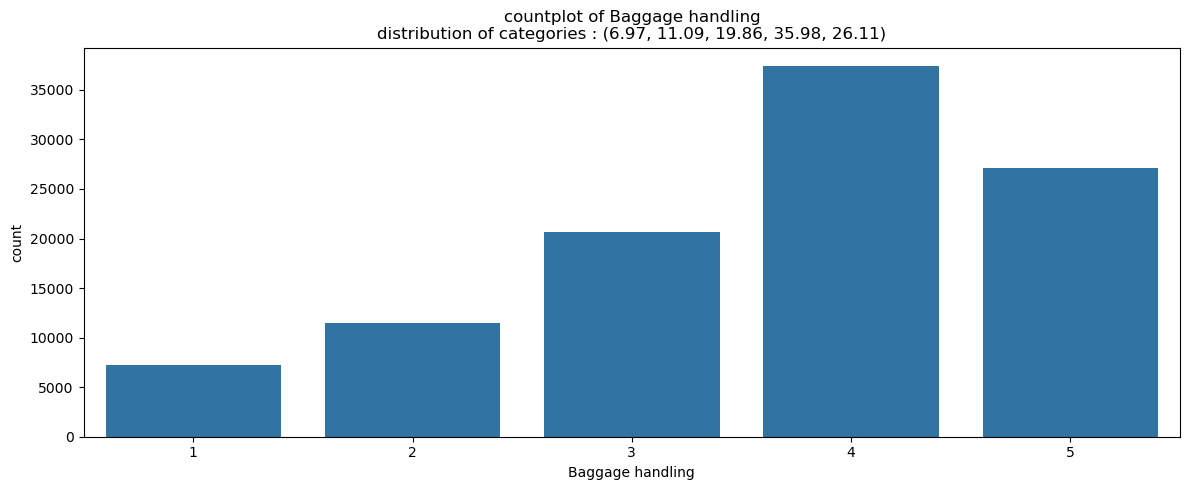

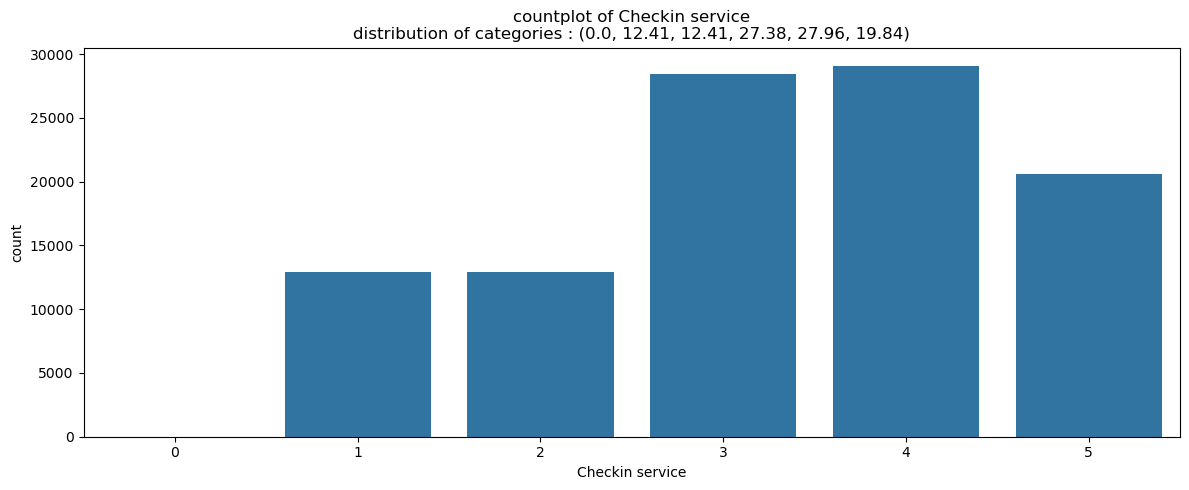

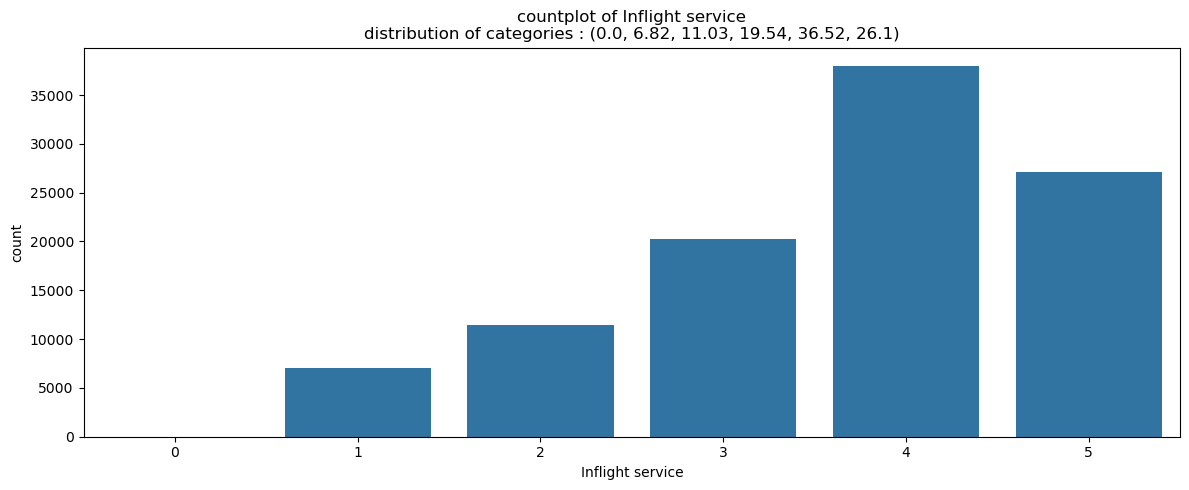

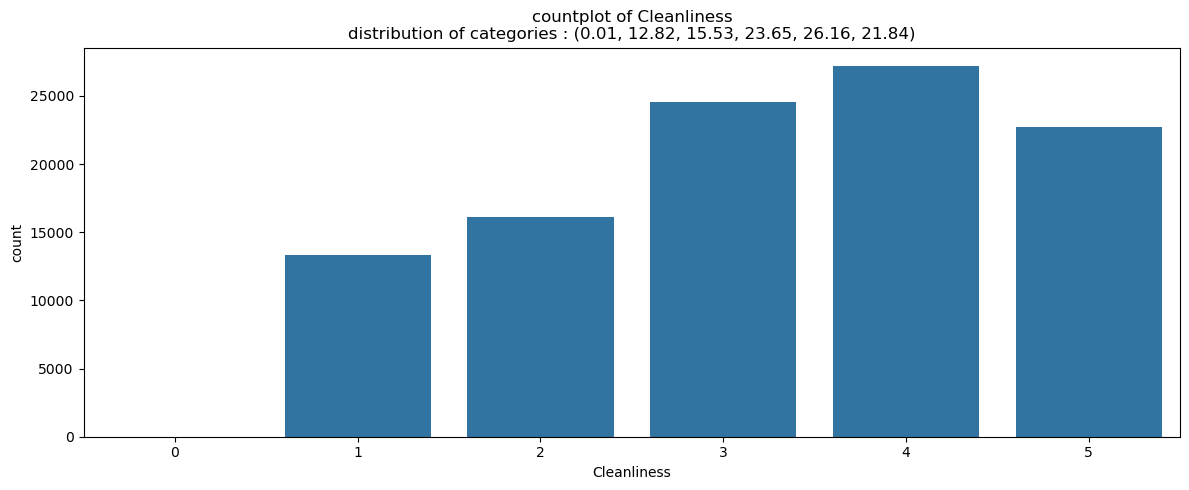

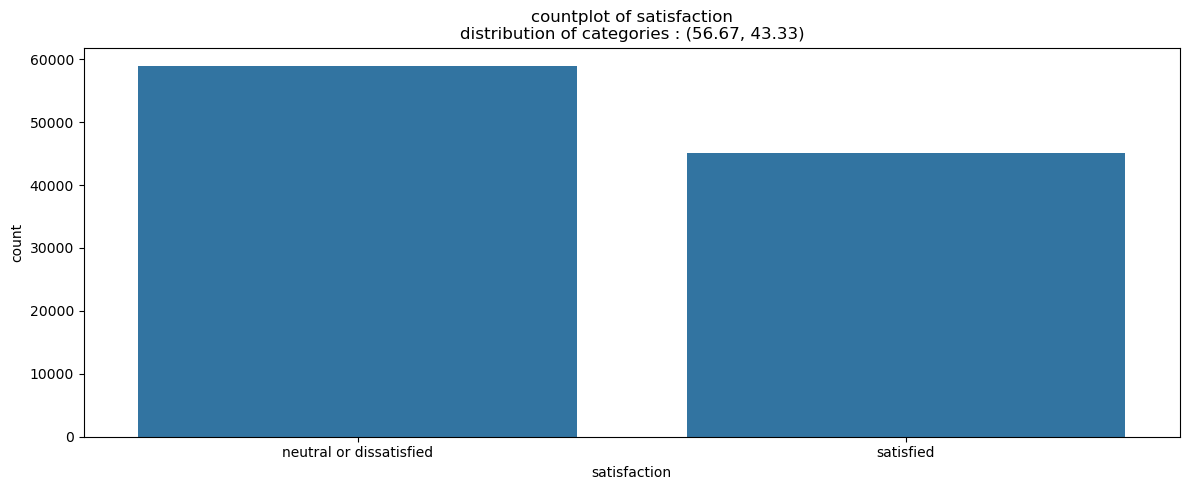

In [7]:
# Visualize categorical columns using countplot.  

def categorical_plot():
    
    for column in categorical_df.index :
        plt.figure(figsize = (12,5))
        sns.countplot(x = column , data = dataset)
        plt.title(f"countplot of {column}\ndistribution of categories : {categorical_analysis_df.loc[column,"distribution of categories"]}")
        plt.tight_layout()
        plt.show()

categorical_plot()

In [8]:
# Aggregates the numerical features using median grouped by satisfaction. 

def numerical_feat_target_relation():
    
    numerical_feat = {}

    for feat in numerical_df.index :
            numerical_feat[feat] = "median"

    return dataset.groupby("satisfaction").agg(numerical_feat)

numerical_feat_target_relation()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,
neutral or dissatisfied,36.0,671.0,0.0,0.0
satisfied,43.0,1250.0,0.0,0.0


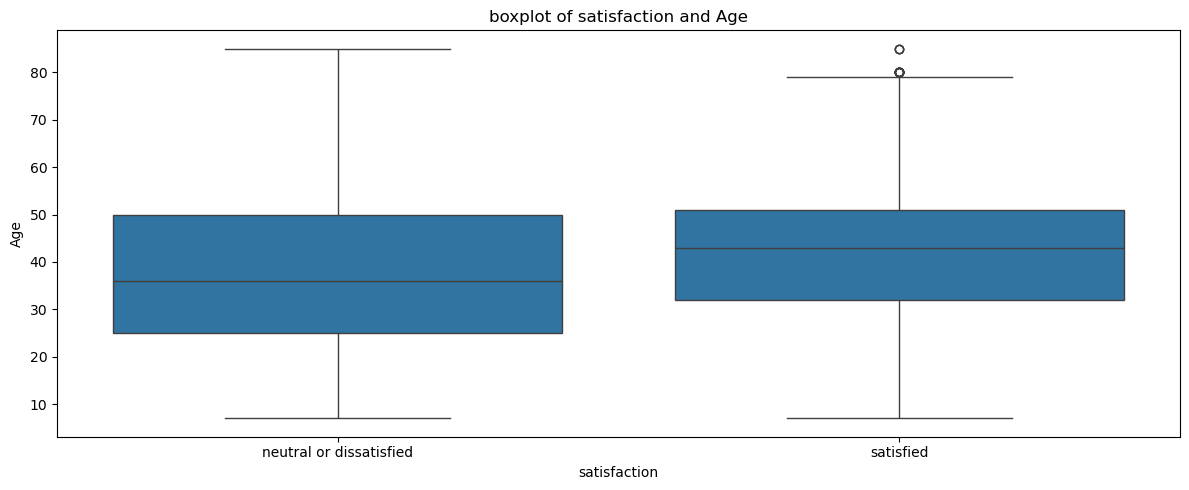

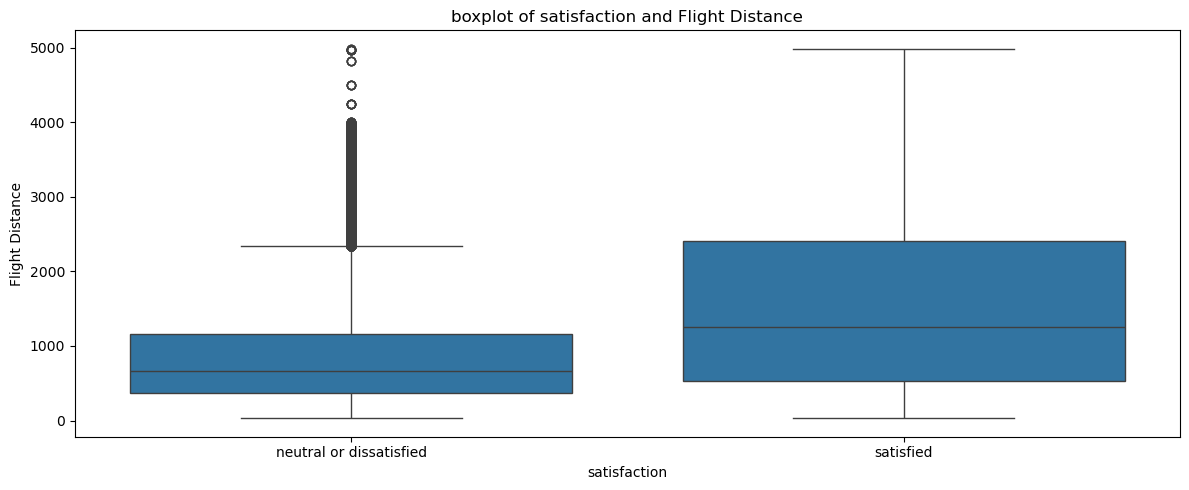

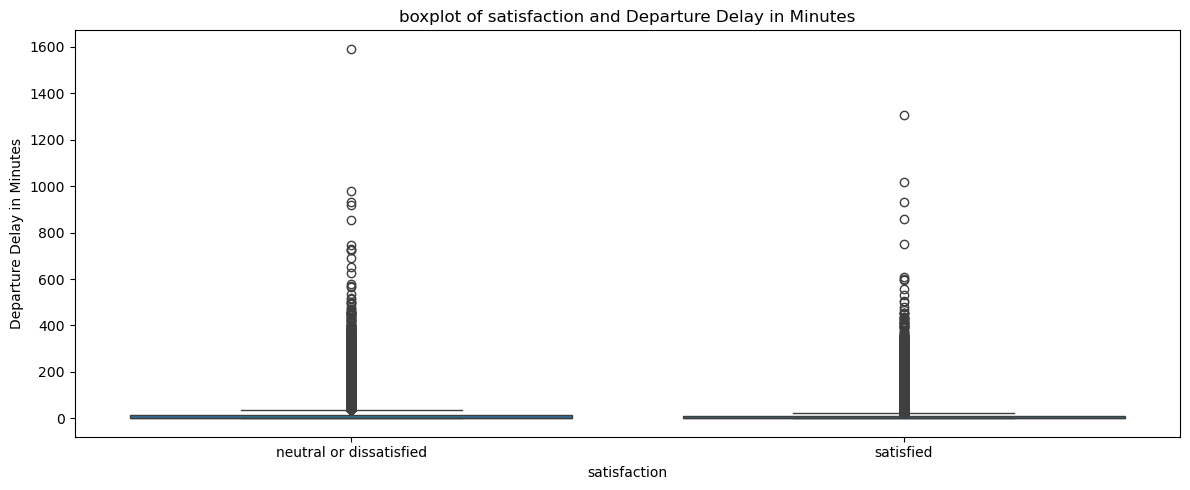

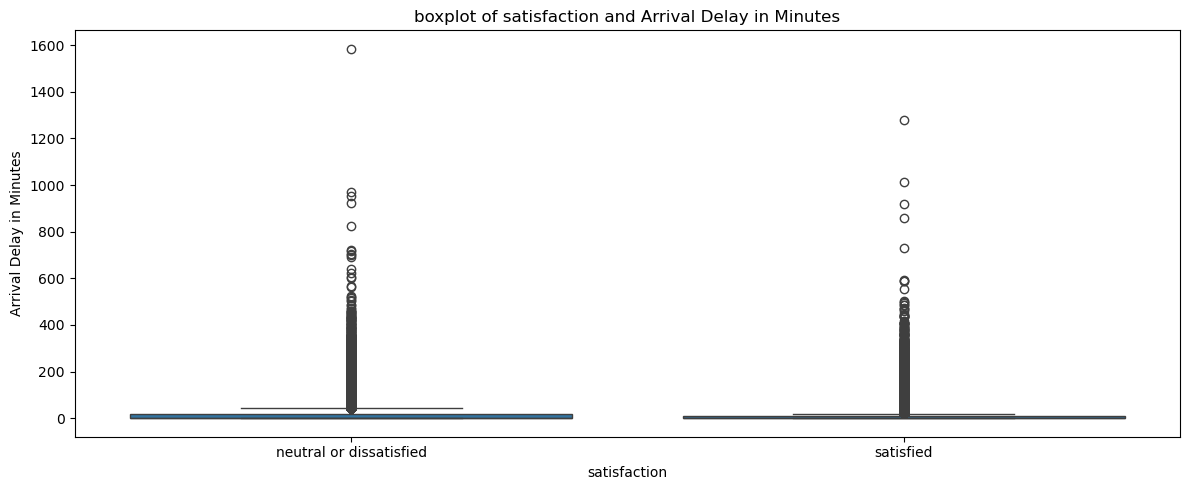

In [9]:
# Displays boxplots of each numerical feature against satisfaction.

def numerical_feat_target_boxplot():

    for feat in numerical_df.index :
        plt.figure(figsize = (12,5))
        sns.boxplot(x = "satisfaction" , y = feat , data = dataset)
        plt.title(f"boxplot of satisfaction and {feat}")
        plt.tight_layout()
        plt.show()

numerical_feat_target_boxplot()

In [10]:
# Computes class-wise satisfaction percentage for each category in categorical features.

def categorical_feat_target_relation():
    
    for feat in list(categorical_df.index)[:-1] :
        feat_dict = {}
        for category in categorical_df.loc[feat,"categories"]:
            feat_dict[category] = [] 
            feat_dict[category].append(((dataset[feat] == category) & (dataset["satisfaction"] == "satisfied")).sum())
            feat_dict[category].append((dataset[feat] == category).sum() - feat_dict[category][0])
            feat_dict[category] = [round(x / dataset.shape[0] * 100 ,2) for x in feat_dict[category]]
    
        print(f"{feat} : \n{pd.DataFrame(feat_dict , index = ["satisfied" , "neutral or dissatisfied"])}")

categorical_feat_target_relation()

Gender : 
                          Male  Female
satisfied                21.65   21.69
neutral or dissatisfied  27.61   29.06
Customer Type : 
                         Loyal Customer  disloyal Customer
satisfied                         39.01               4.32
neutral or dissatisfied           42.72              13.94
Type of Travel : 
                         Personal Travel  Business travel
satisfied                           3.16            40.18
neutral or dissatisfied            27.88            28.79
Class : 
                         Eco Plus  Business    Eco
satisfied                    1.77     33.18   8.37
neutral or dissatisfied      5.44     14.61  36.61
Inflight wifi service : 
                            0      1      2      3      4      5
satisfied                2.98   5.59   6.18   6.24  11.41  10.94
neutral or dissatisfied  0.01  11.58  18.68  18.66   7.64   0.10
Departure/Arrival time convenient : 
                            0     1     2     3      4      5
satisf

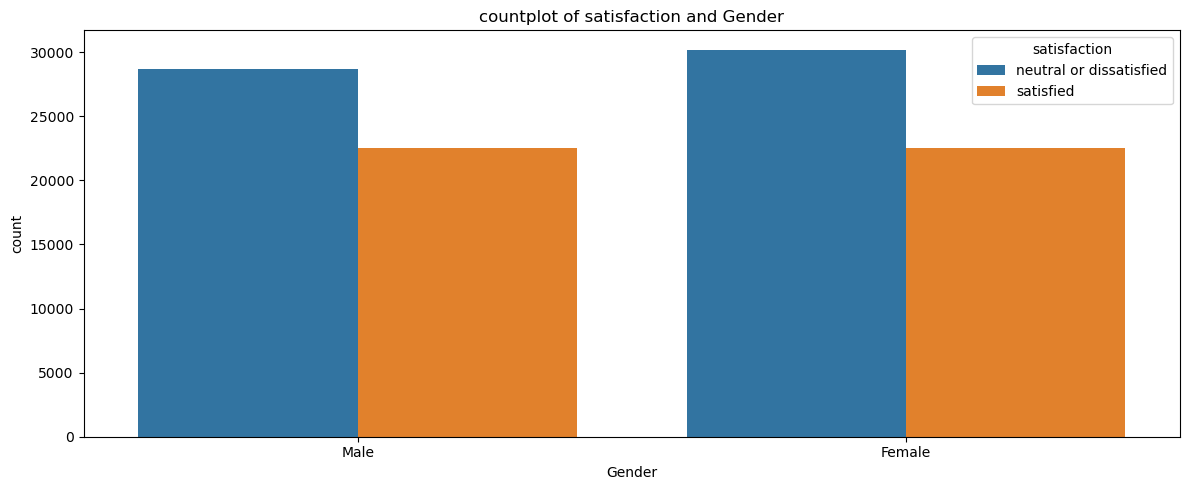

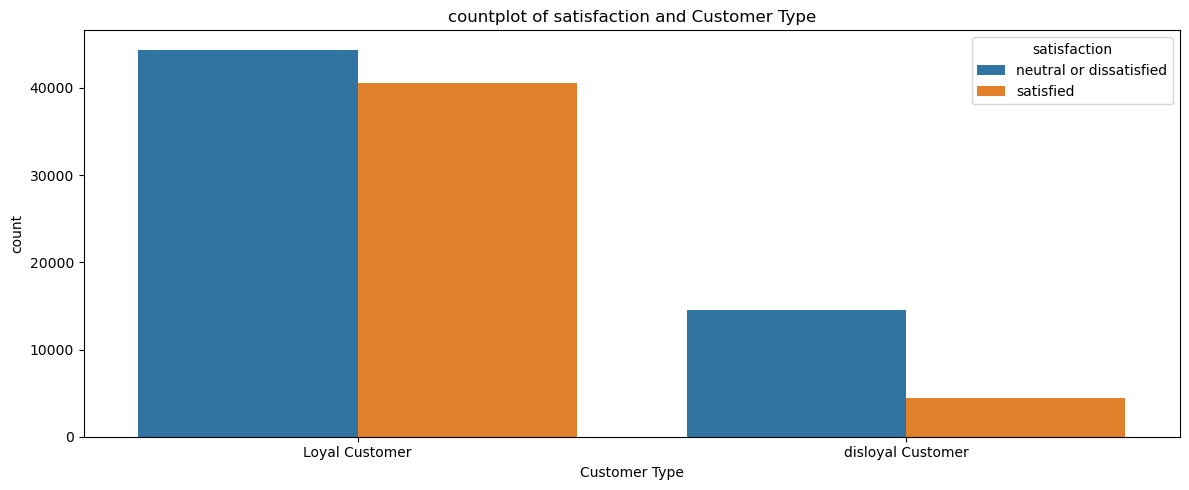

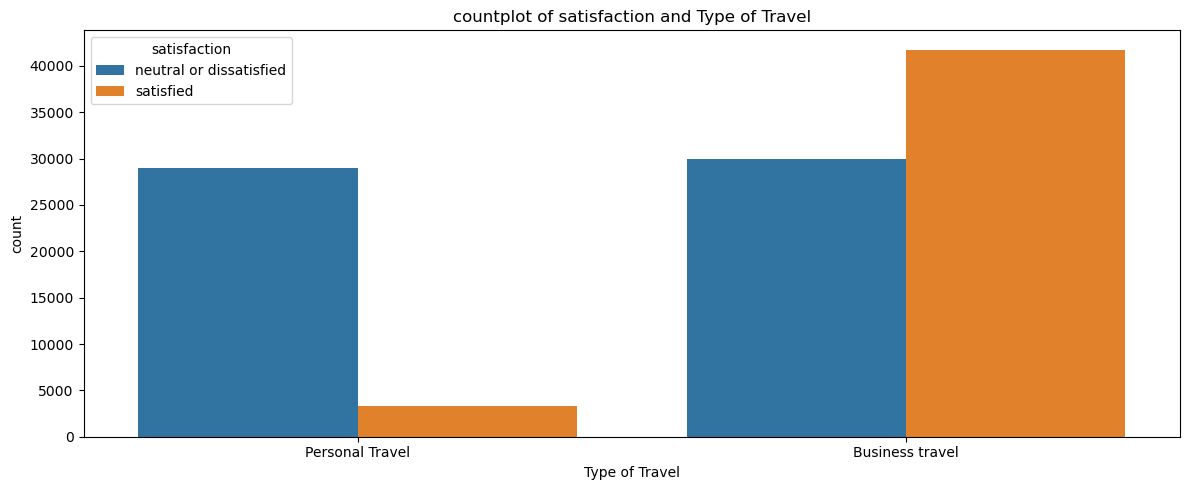

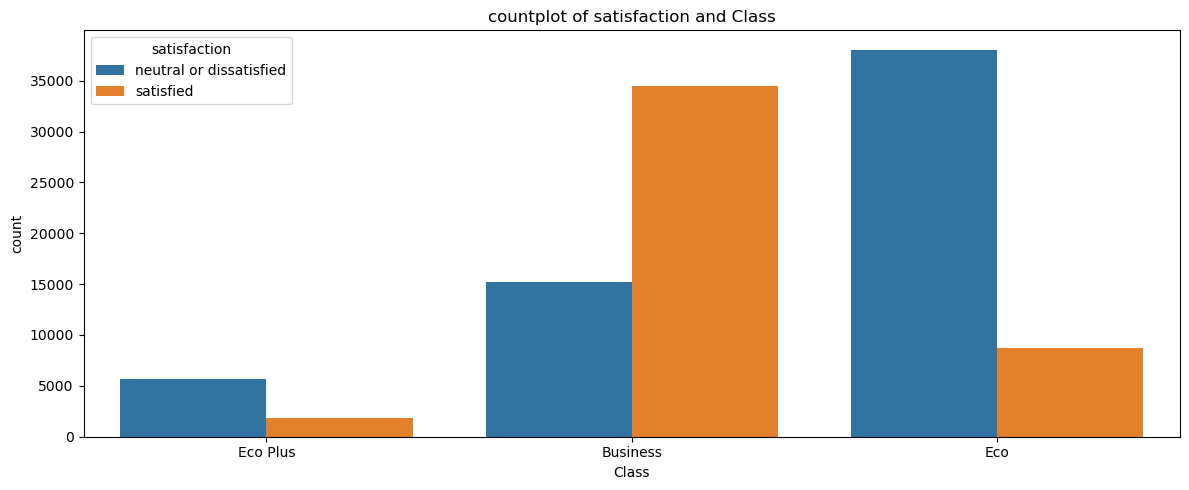

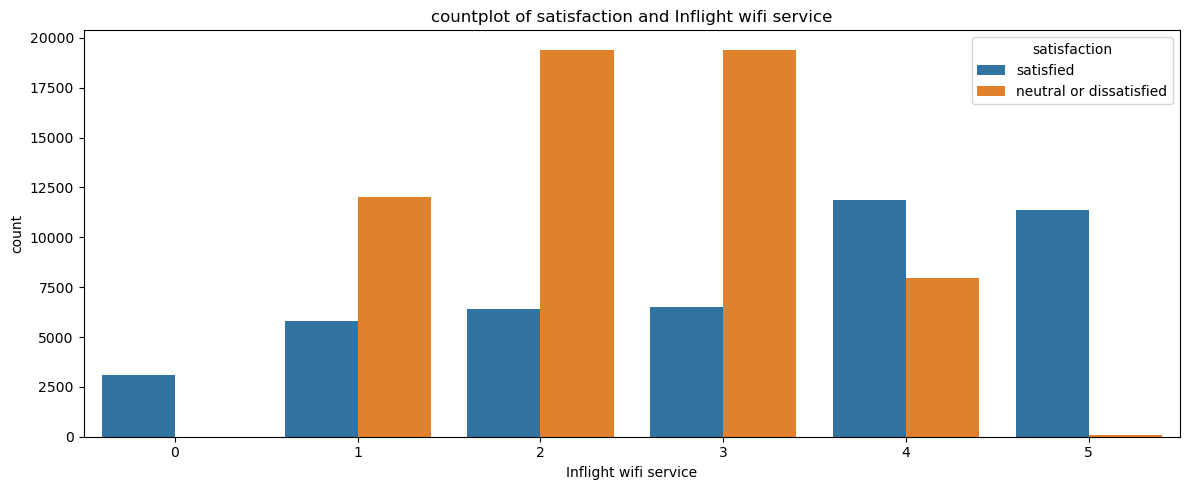

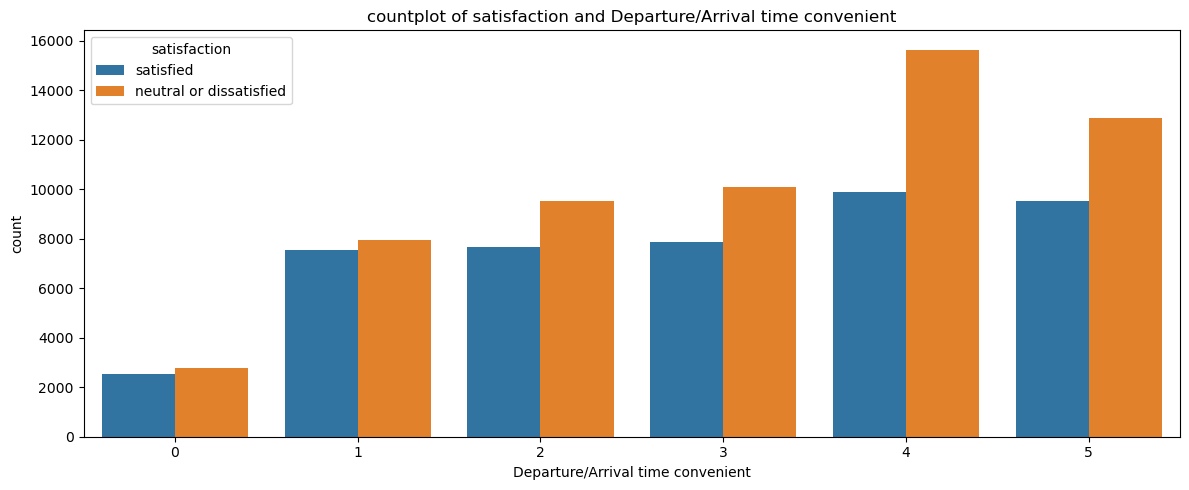

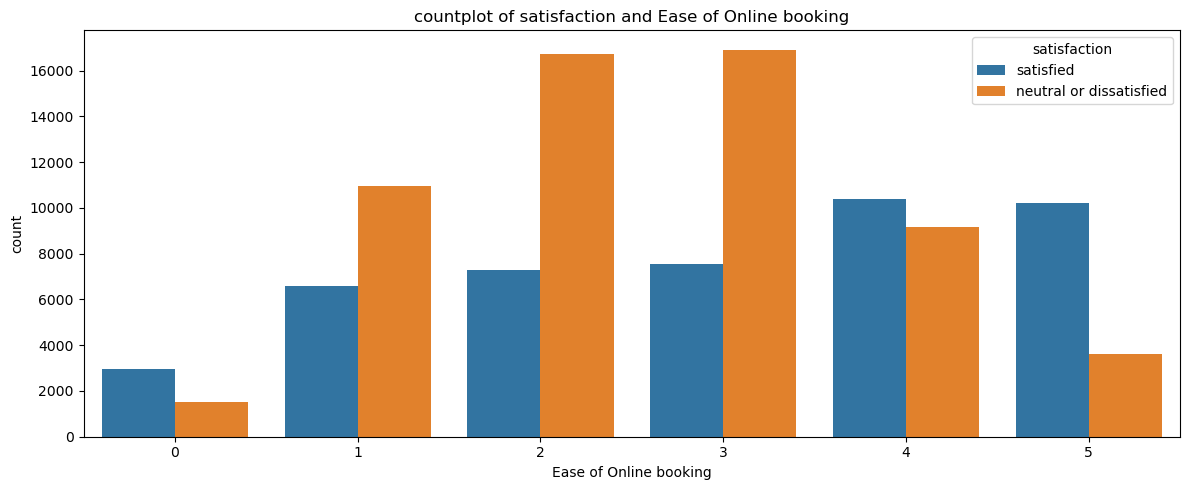

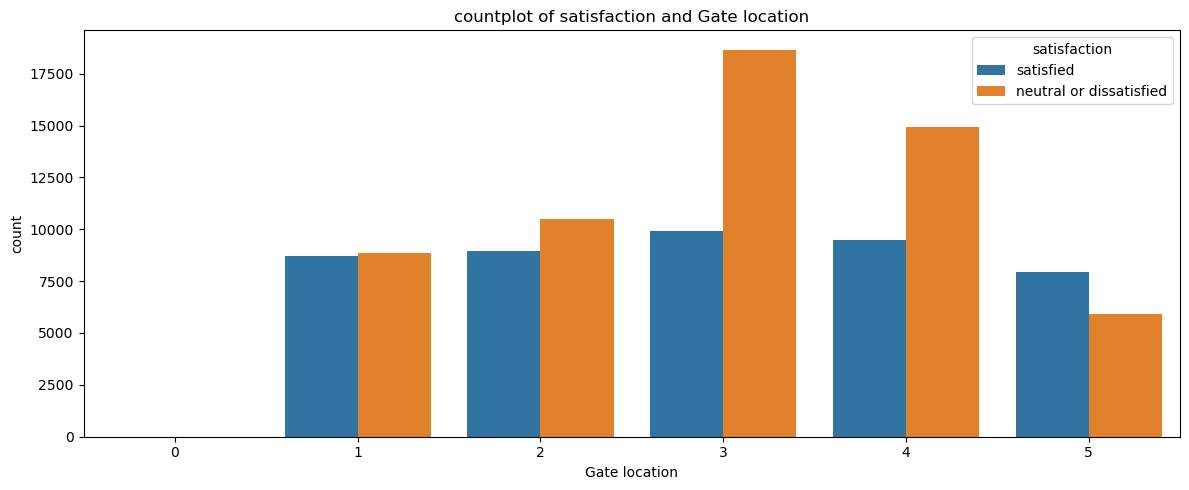

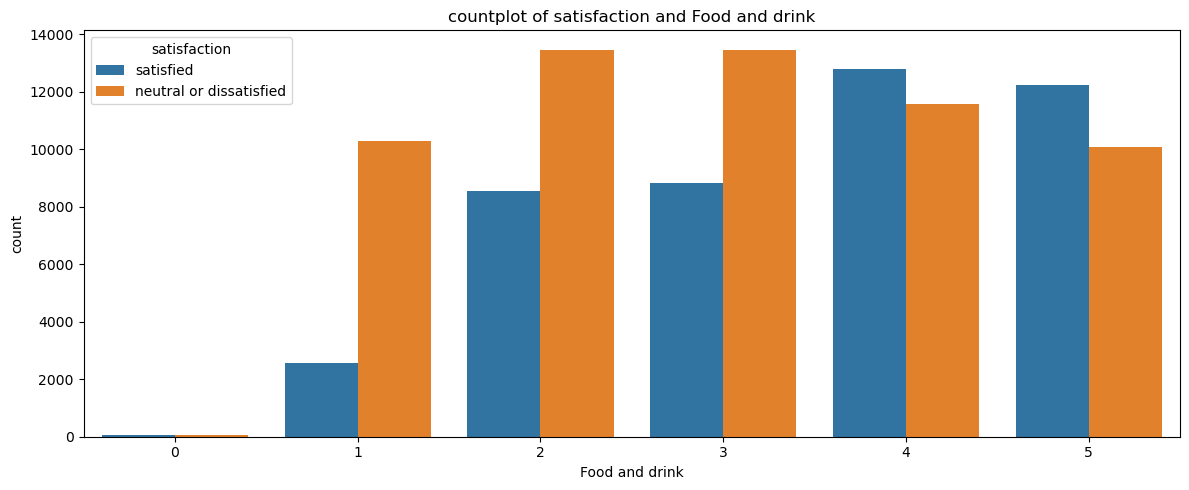

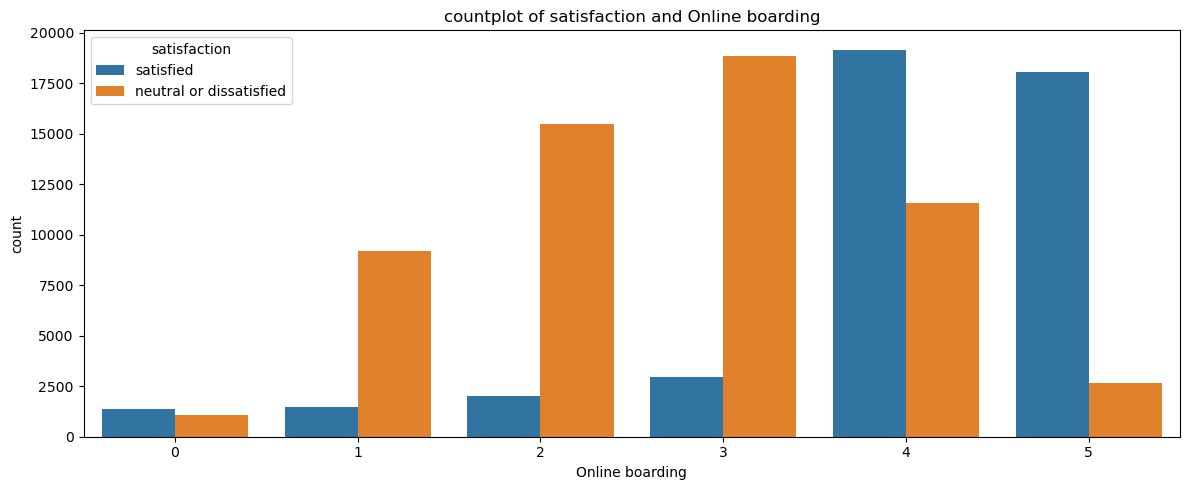

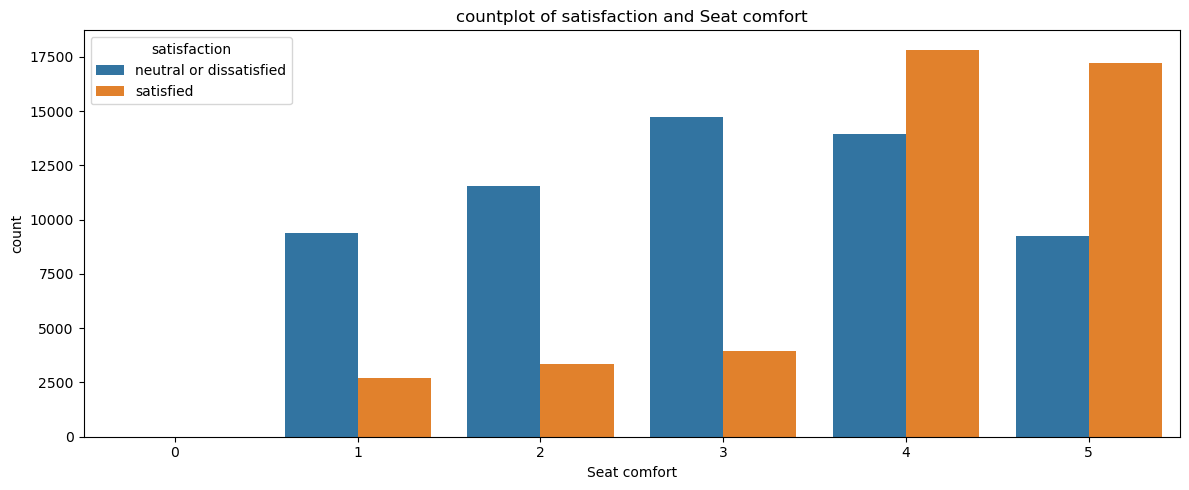

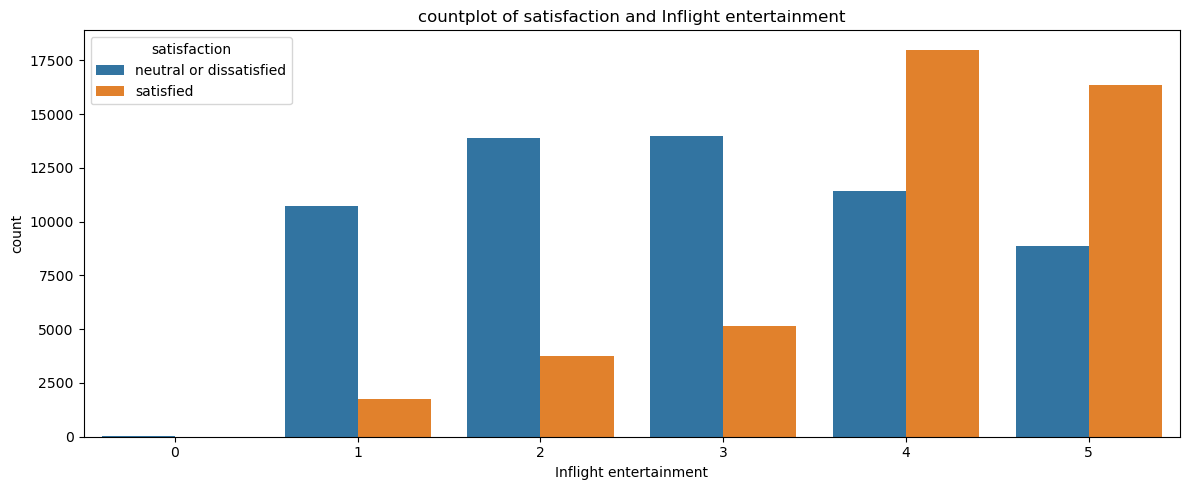

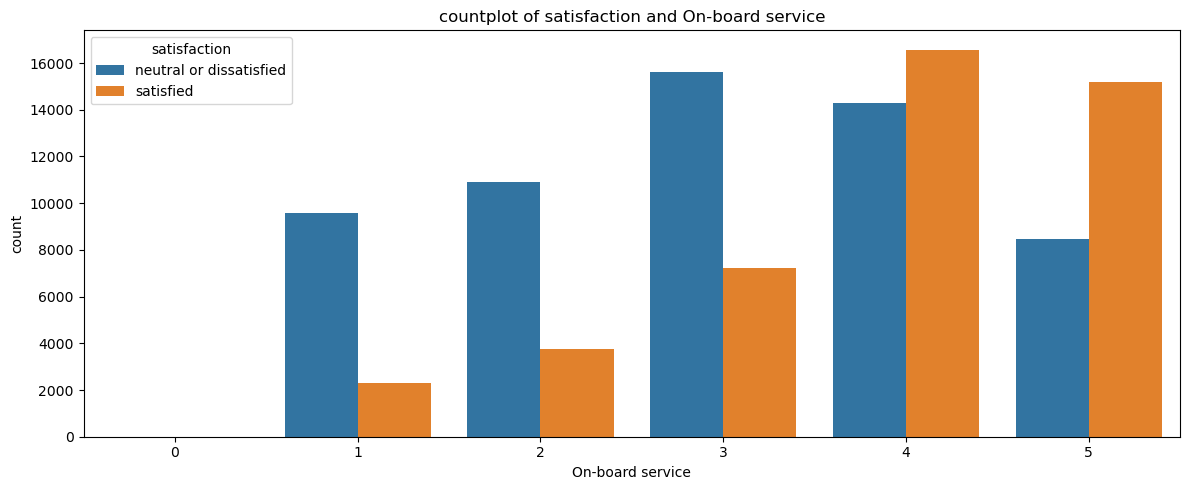

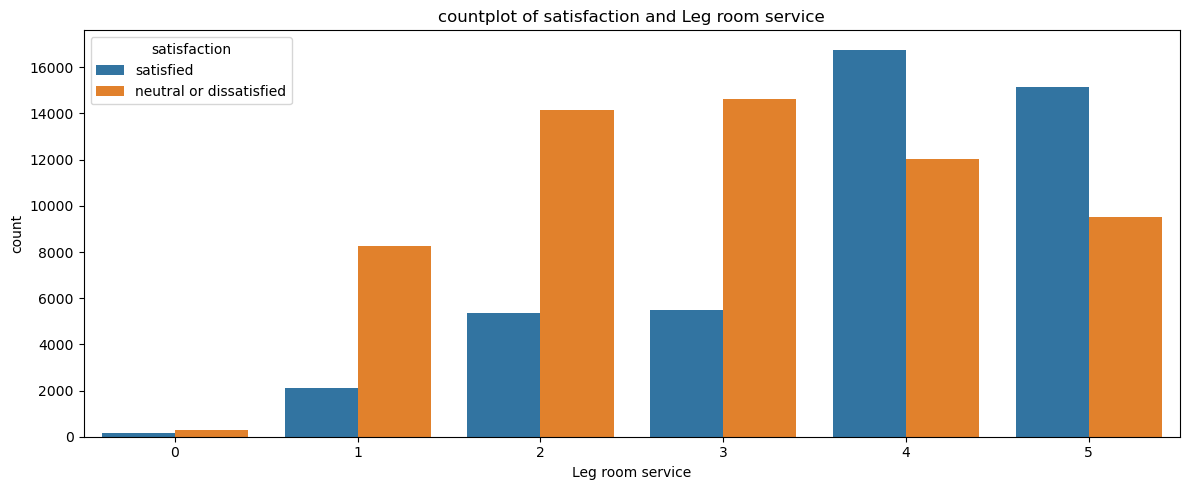

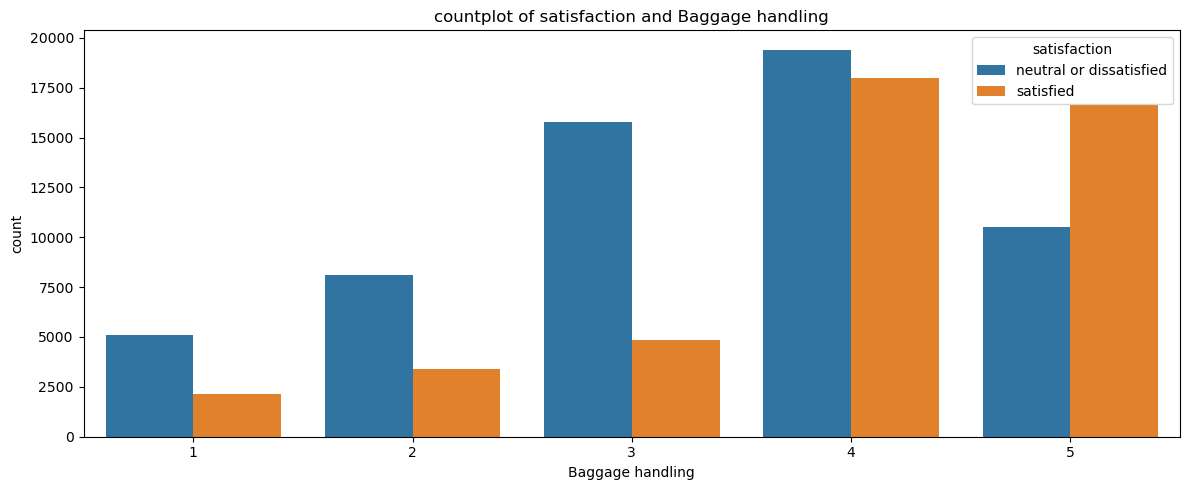

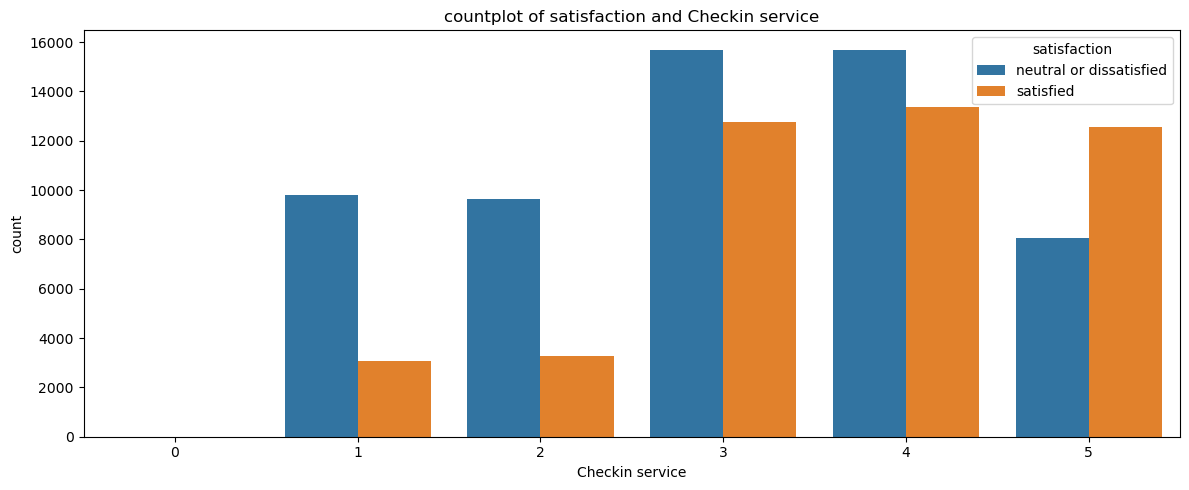

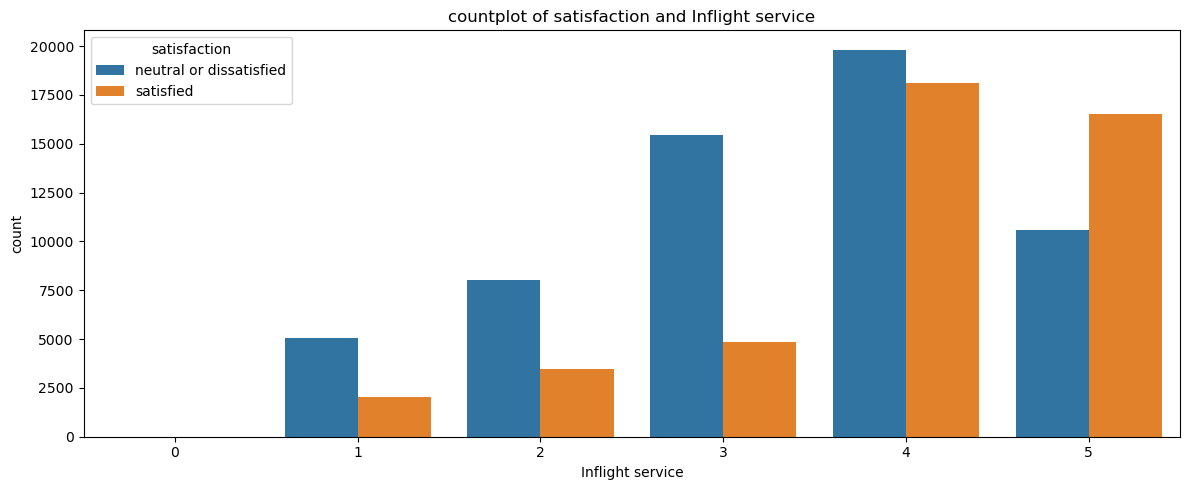

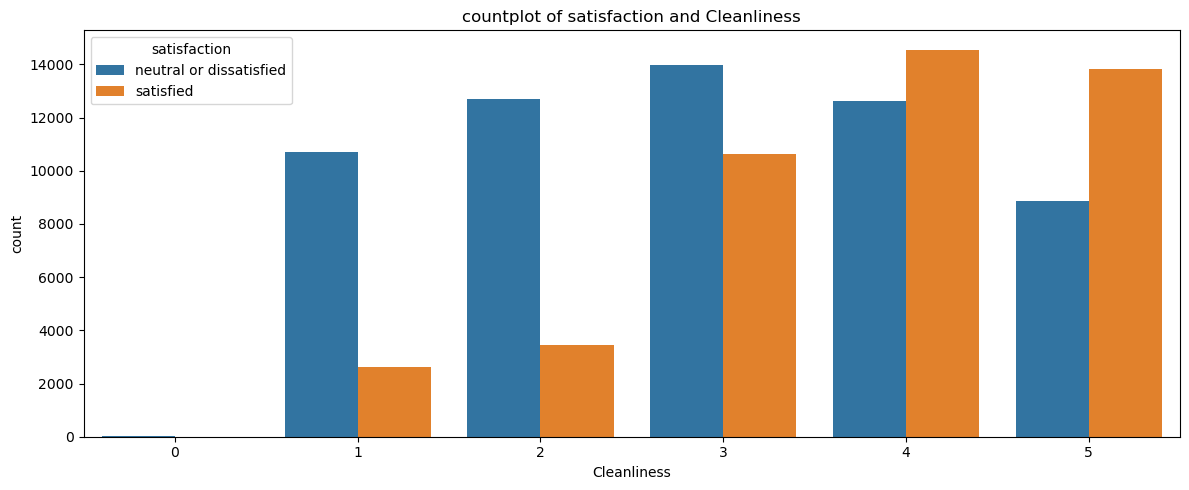

In [11]:
# Visualizes satisfaction distribution for each category in categorical features. 

def categorical_feat_target_countplot():
    
    for feat in list(categorical_df.index)[:-1] :
        plt.figure(figsize = (12,5))
        sns.countplot(x = feat , hue = "satisfaction" , data = dataset)
        plt.title(f"countplot of satisfaction and {feat}")
        plt.tight_layout()
        plt.show()

categorical_feat_target_countplot()

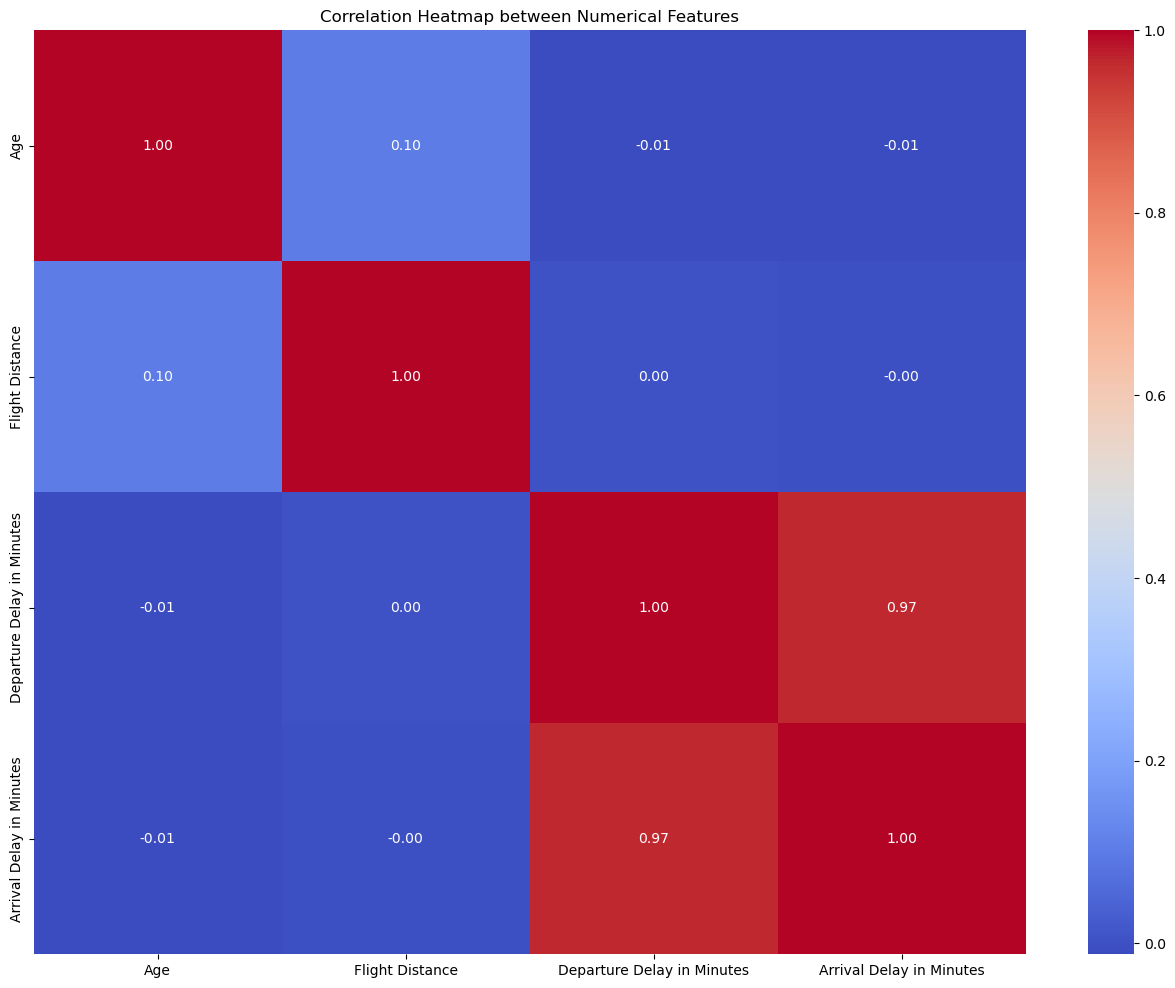

In [12]:
# Visualizes correlation between numerical features using a heatmap.

def numericals_correlation():
    
    plt.figure(figsize = (16,12))
    sns.heatmap(dataset.loc[: , list(numerical_df.index)].corr() , annot = True , cmap = "coolwarm" , fmt = ".2f")
    plt.title("Correlation Heatmap between Numerical Features")
    plt.show()

numericals_correlation()

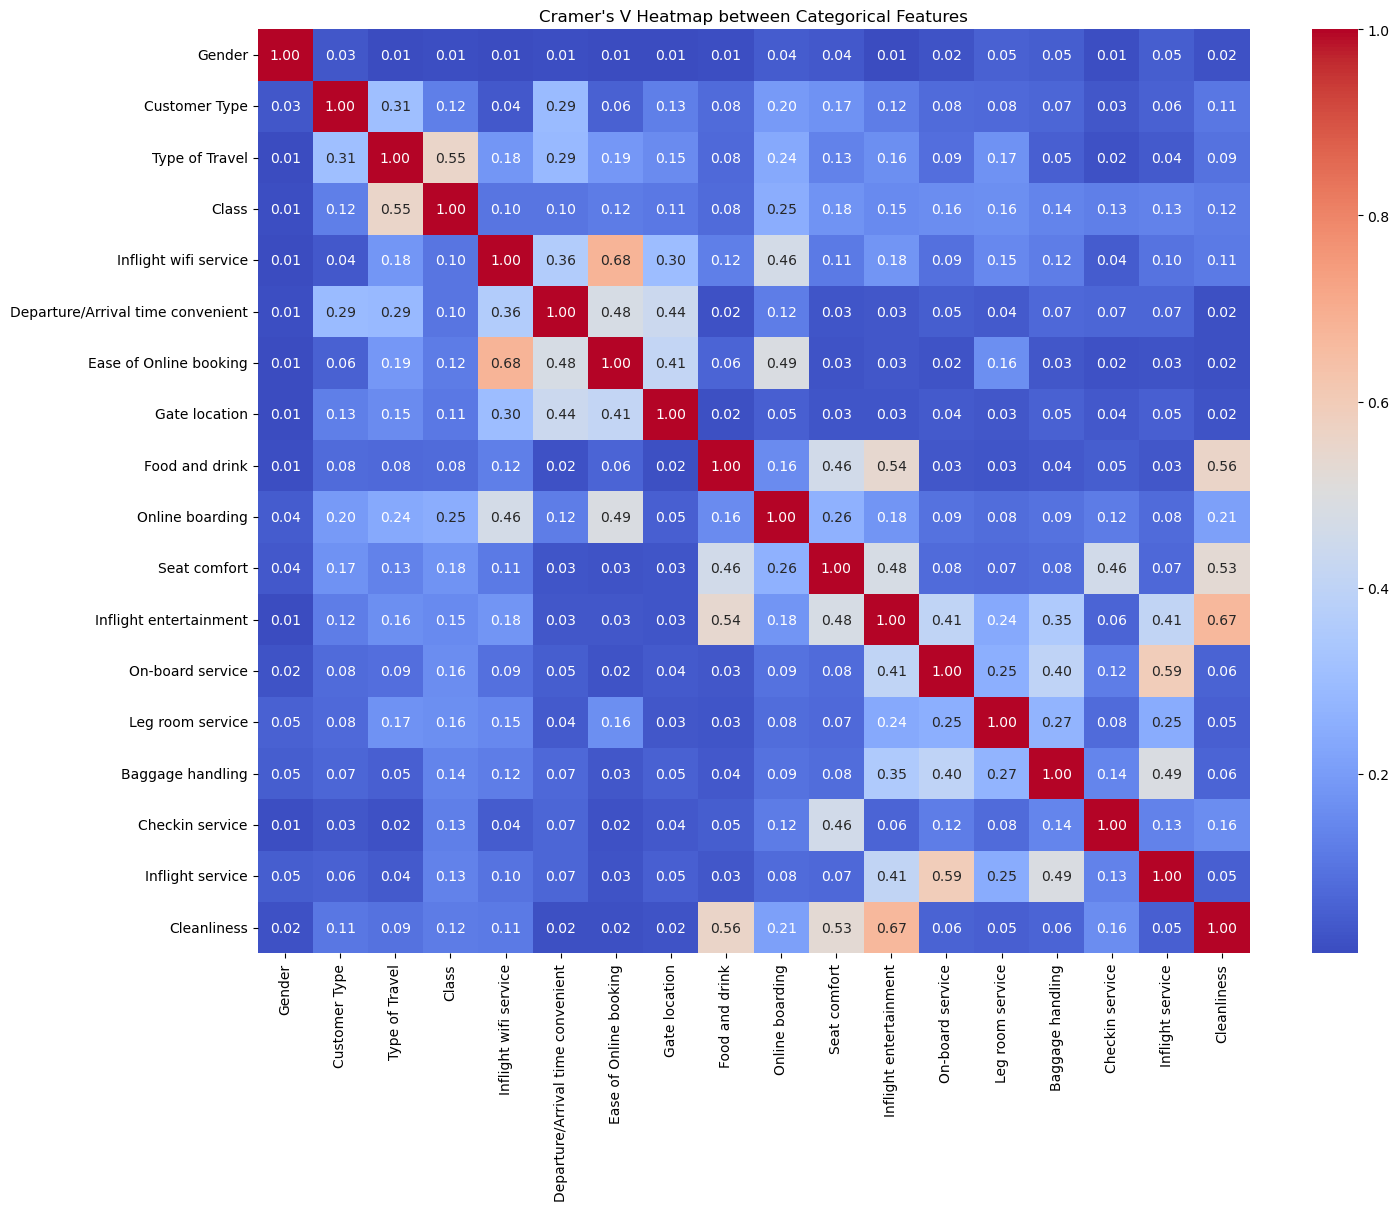

In [13]:
from scipy.stats import chi2_contingency

from math import sqrt 

# Computes contigency table for two categorical features.

def contingency_table(feat_1 , feat_2):
    
    ct = [[] for _ in range(categorical_df.loc[feat_1 , "number of categories"])] 

    r = 0 
    for category_1 in categorical_df.loc[feat_1 , "categories"] :
        c = 0 
        for category_2 in categorical_df.loc[feat_2 , "categories"] : 
            ct[r].append(((dataset[feat_1] == category_1) & (dataset[feat_2] == category_2)).sum())
            c += 1
        r += 1 
    
    return min(r,c) , ct 

# Computes Cramér's V correlation matrix for all categorical features and visualizes it as a heatmap. 

def cramer_vmatrix():
    
    v_matrix = {}

    for feat_1 in list(categorical_df.index)[:-1] :
        v_matrix[feat_1] = [] 
        for feat_2 in list(categorical_df.index)[:-1] :
            if feat_1 == feat_2 :
                v_matrix[feat_1].append(1.0)
            else : 
                k , ct = contingency_table(feat_1,feat_2)
                chi2 = chi2_contingency(ct)[0]
                v_matrix[feat_1].append(sqrt(chi2 / ((k-1) * dataset.shape[0])))

    v_matrix = pd.DataFrame(v_matrix , index = list(categorical_df.index)[:-1])
    plt.figure(figsize = (16,12))
    sns.heatmap(v_matrix , annot = True , cmap = "coolwarm" , fmt = ".2f")
    plt.title("Cramer's V Heatmap between Categorical Features")
    plt.show()


cramer_vmatrix()